# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data 

In [2]:
df = pd.read_csv("../data/cleaned_credit_ratings.csv")
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rating Agency                  7805 non-null   object 
 1   Corporation                    7805 non-null   object 
 2   Rating                         7805 non-null   object 
 3   Rating Date                    7805 non-null   object 
 4   CIK                            7805 non-null   int64  
 5   Binary Rating                  7805 non-null   int64  
 6   SIC Code                       7805 non-null   float64
 7   Sector                         7805 non-null   object 
 8   Ticker                         7805 non-null   object 
 9   Current Ratio                  7805 non-null   float64
 10  Long-term Debt / Capital       7805 non-null   float64
 11  Debt/Equity Ratio              7805 non-null   float64
 12  Gross Margin                  

# Summary Statistics for Numerical Variables
Display summary statistics for numerical columns to understand their distributions.

In [3]:
print("\nSummary Statistics (Numerical):")
print(df.describe())


Summary Statistics (Numerical):
                CIK  Binary Rating     SIC Code  Current Ratio  \
count  7.805000e+03    7805.000000  7805.000000    7805.000000   
mean   7.371616e+05       0.653299  4052.576810       1.852727   
std    5.143542e+05       0.475950  1870.848802       1.295572   
min    1.750000e+03       0.000000   100.000000       0.481508   
25%    9.355600e+04       0.000000  2834.000000       1.077300   
50%    8.795260e+05       1.000000  3714.000000       1.496800   
75%    1.091587e+06       1.000000  4931.000000       2.161000   
max    1.748790e+06       1.000000  9997.000000       8.132600   

       Long-term Debt / Capital  Debt/Equity Ratio  Gross Margin  \
count               7805.000000        7805.000000   7805.000000   
mean                   0.452804           1.113450     42.433909   
std                    2.629158           3.592178     23.742020   
min                  -86.363600         -14.539800    -87.684000   
25%                    0.286500 

# Summary Statistics for Categorical Variables
Display counts of unique values in categorical columns.

In [4]:
categorical_cols = ['Rating Agency', 'Corporation', 'Sector', 'Rating']
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())


Value Counts for Rating Agency:
Rating Agency
Egan-Jones Ratings Company            2826
Standard & Poor'S Ratings Services    2813
Moody'S Investors Service             1636
Fitch Ratings                          477
Dbrs                                    26
Japan Credit Rating Agency,Ltd.         22
Hr Ratings De Mexico S.A. De C.V.        5
Name: count, dtype: int64

Value Counts for Corporation:
Corporation
Duke Energy Corporation                33
Chevron Corporation                    31
Amgen Inc.                             30
Mgm Resorts International              27
Union Pacific Corporation              26
                                       ..
Braskem International Ltd               1
Brookfield Renewable Partners Ulc       1
Oxford Industries, Inc.                 1
Benchmark Electronics, Inc.             1
Select Medical Holdings Corporation     1
Name: count, Length: 1219, dtype: int64

Value Counts for Sector:
Sector
Other    1251
Manuf     981
Buseq     958
Utils 

# Univariate Analysis - Numerical Variables
Plot histograms and KDE plots to visualize distributions of numerical variables.

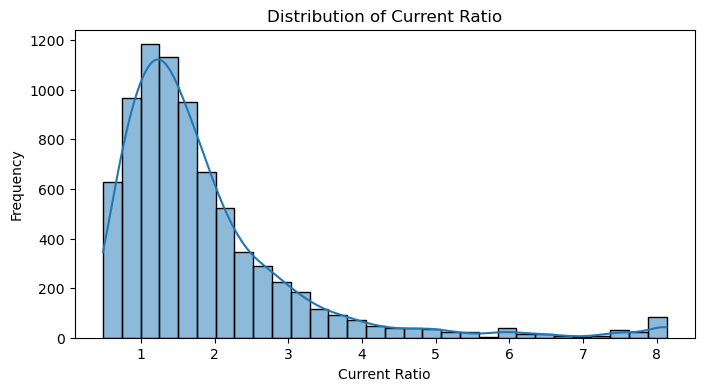

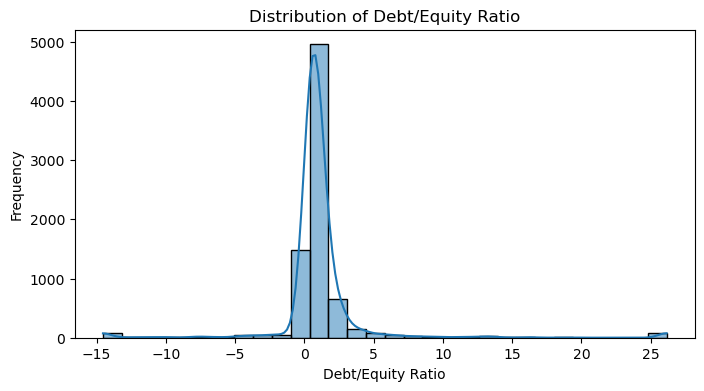

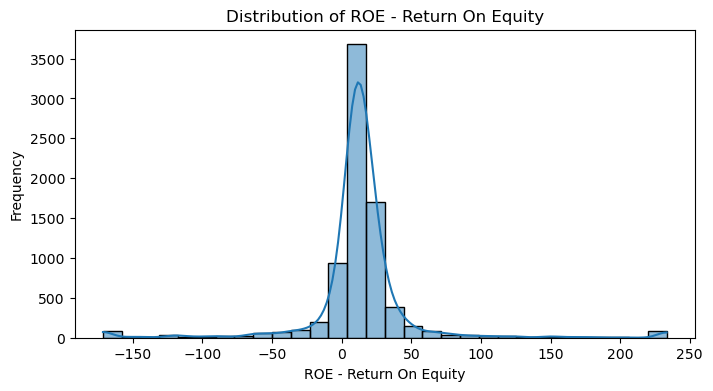

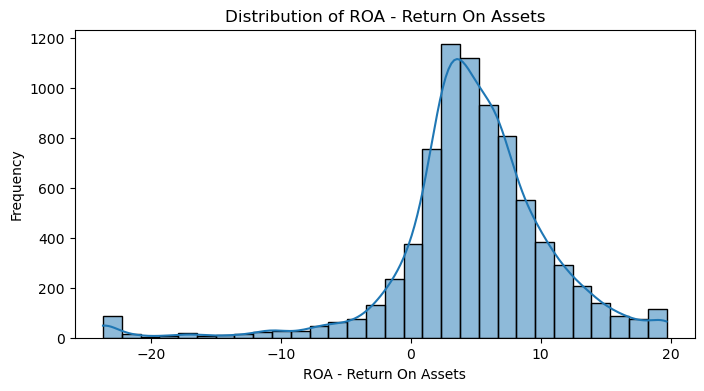

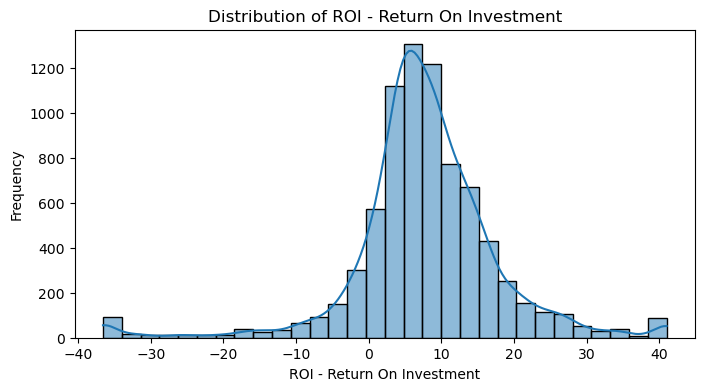

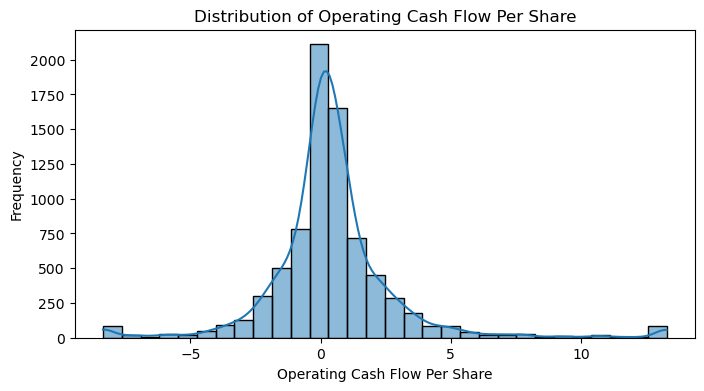

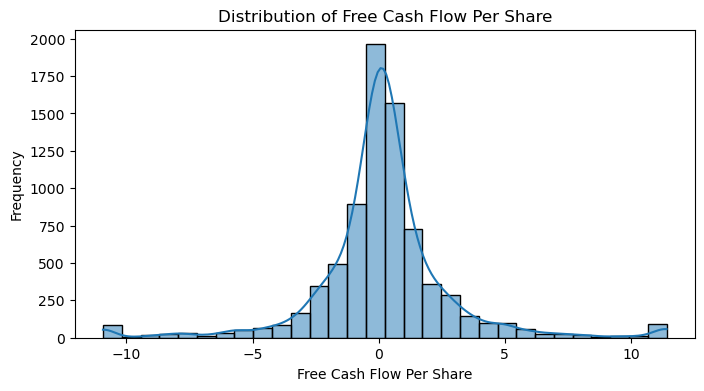

In [5]:
num_cols = [
    "Current Ratio", "Debt/Equity Ratio", "ROE - Return On Equity",
    "ROA - Return On Assets", "ROI - Return On Investment",
    "Operating Cash Flow Per Share", "Free Cash Flow Per Share"
]

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Summary of Findings (Numerical Values)
1. Current Ratio:
- Most values fall between 0.5 and 2 (median: 1.50), indicating a reasonable ability to cover short-term liabilities.
- Outliers: Some companies have extremely high values (e.g., 8.13), representing excessive liquidity.
2. Debt/Equity Ratio:
- Median: 0.75, with most values concentrated between 0 and 2.
- Negative values (e.g., -14.54) suggest companies with negative equity, while extreme positives (e.g., 26.15) reflect highly leveraged firms.
3. ROE (Return on Equity):
- Median: 12.5%, but extreme values range from -171.45% to 233.33%.
- Indicates significant variation in profitability across firms.
4. ROA (Return on Assets):
- Median: 4.77%, with values ranging from -23.71% to 19.68%.
- Suggests moderate returns for most companies, with a few notable outliers.
5. ROI (Return on Investment):
- Median: 7.44%, with values ranging from -36.57% to 40.98%.
- Reflects a mix of negative returns (losses) and high-performing investments.
6. Operating Cash Flow Per Share:
- Median: 0.24, with values ranging from -8.36 to 13.29.
- Negative values are likely valid for companies reinvesting heavily.
7. Free Cash Flow Per Share:
- Median: 0.13, with values spanning -10.93 to 11.41.
- Indicates varied free cash flow levels, with many companies near break-even.

# Univariate Analysis - Categorical Variables
Plot bar charts for categorical columns to understand their distributions.

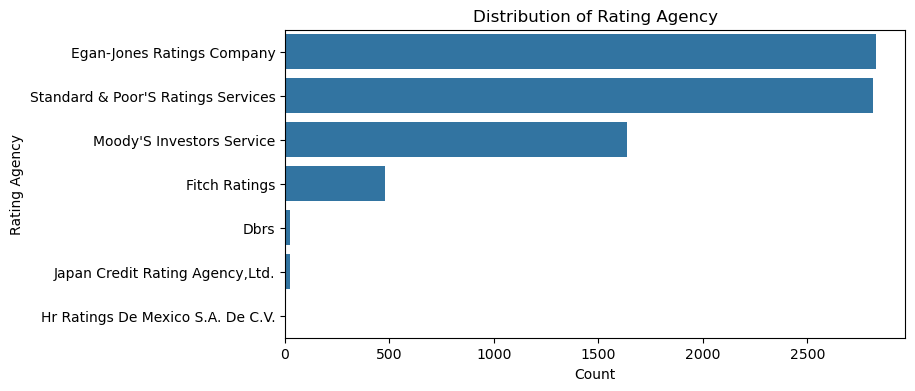

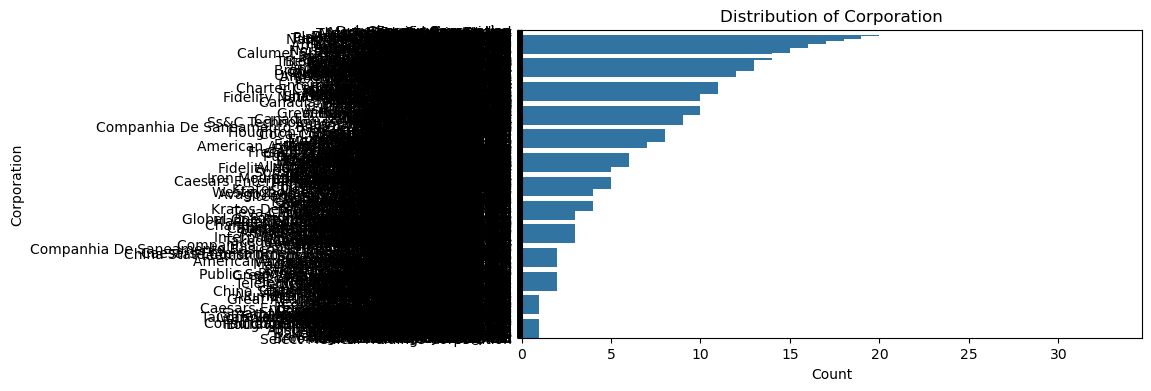

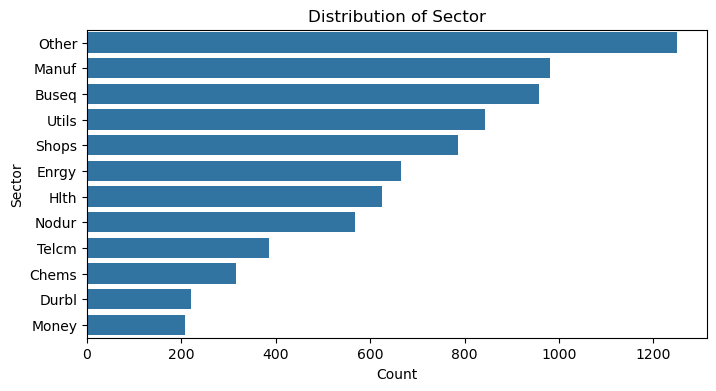

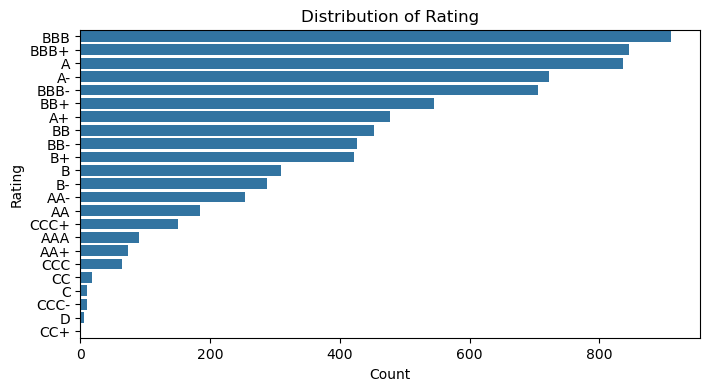

In [6]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

## Summary of Findings
1. Rating Agency:
- Dominated by Egan-Jones (2826 ratings), S&P (2813 ratings), and Moody’s (1636 ratings), with minor contributions from smaller agencies.
2. Corporation:
- 1219 unique companies, with Duke Energy (33 ratings) and Chevron (31 ratings) being the most frequent.
3. Sector:
- Largest sectors: Other (1251), Manufacturing (981), and Business Equipment (958).
- Smaller sectors: Money (207) and Durables (221).
4. Rating:
- Most common ratings: BBB (910), BBB+ (846), and A (836).
- Few companies have extreme ratings like D (5) or CC+ (1).

# Correlation Heatmap
Display a heatmap of correlations between numerical variables to detect strong associations.

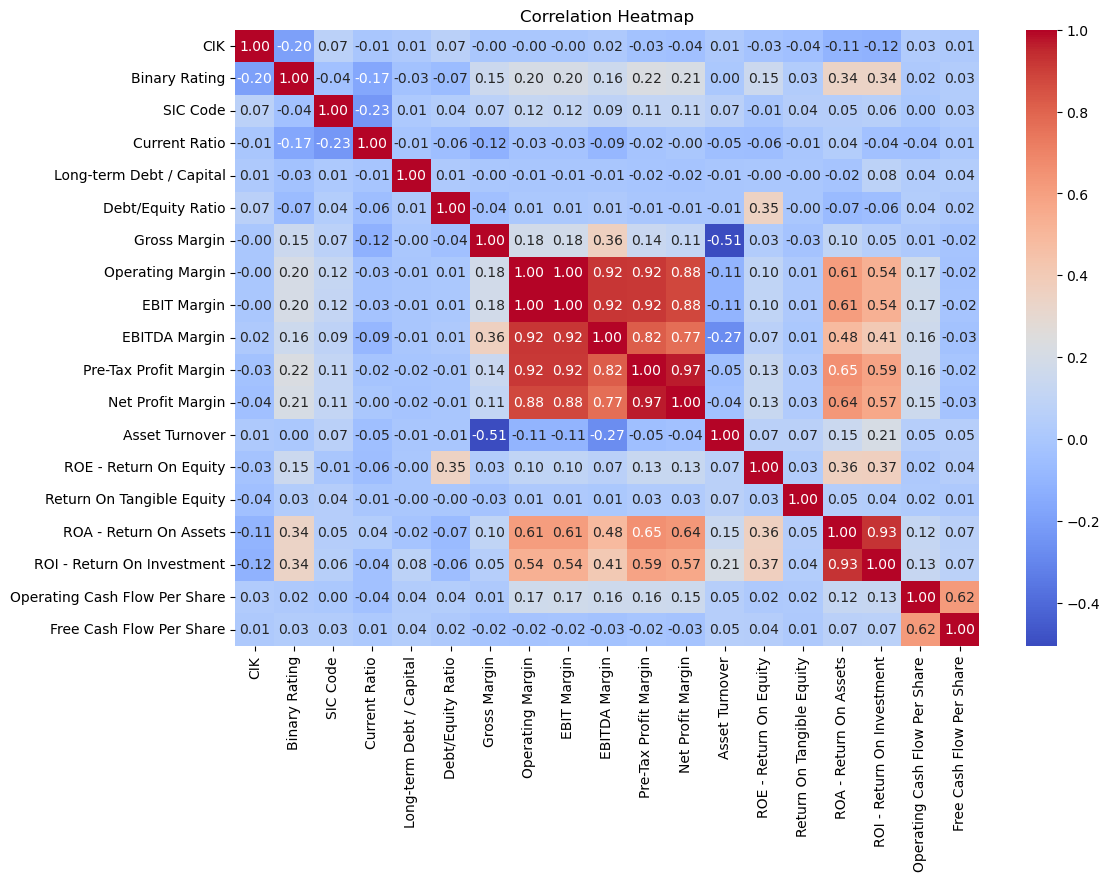

In [7]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Bivariate Analysis - Scatter Plots
Plot scatter plots to visualize relationships between financial ratios and ratings.

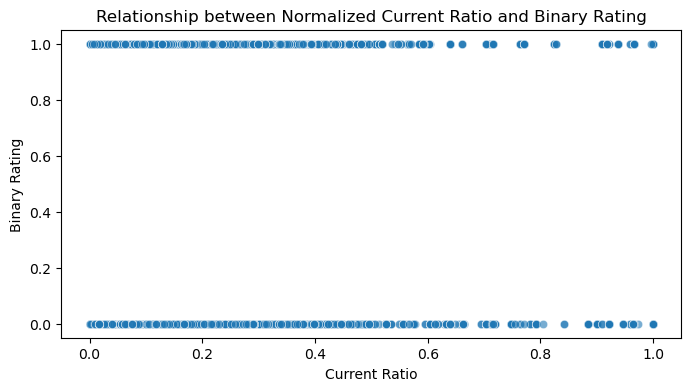

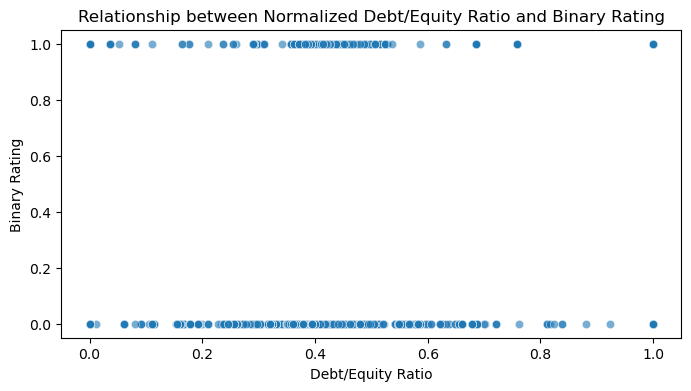

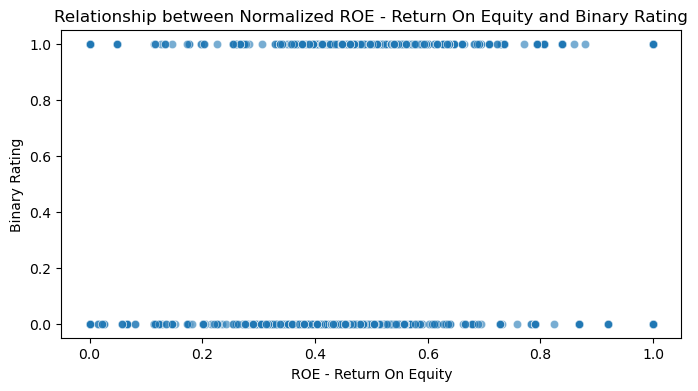

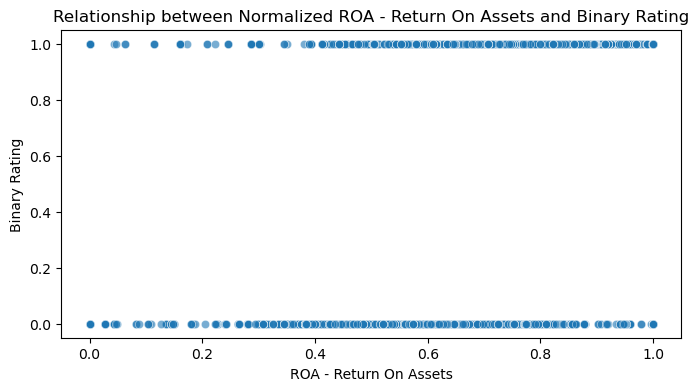

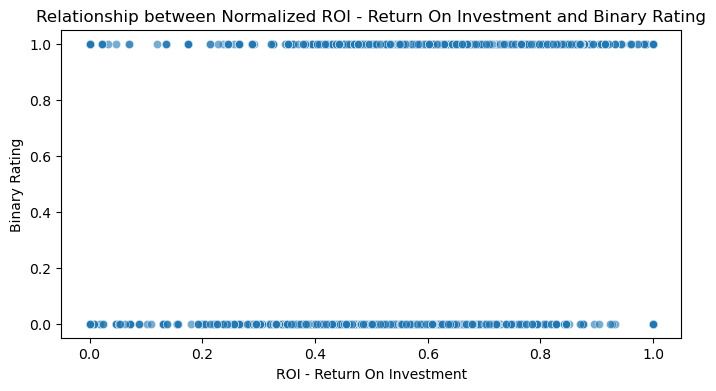

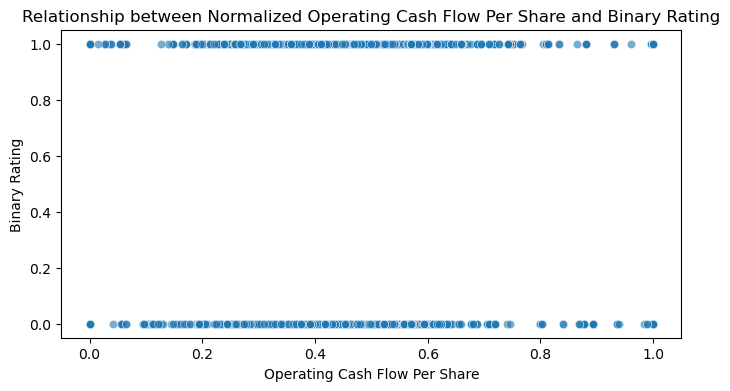

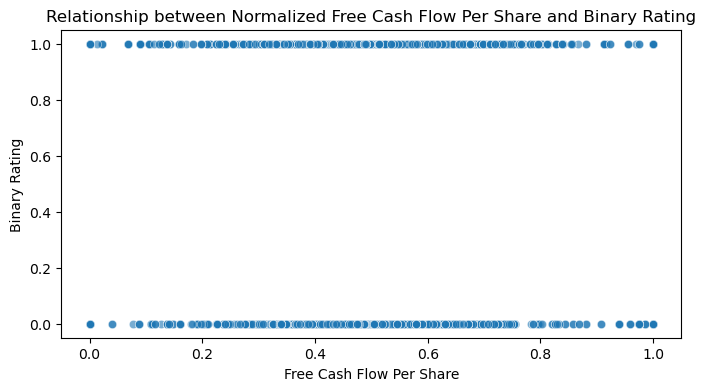

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Select financial ratio columns to normalize
ratio_cols = [
    "Current Ratio", "Debt/Equity Ratio", "ROE - Return On Equity",
    "ROA - Return On Assets", "ROI - Return On Investment",
    "Operating Cash Flow Per Share", "Free Cash Flow Per Share"
]

# Apply Min-Max Scaling to financial ratios
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[ratio_cols] = scaler.fit_transform(df[ratio_cols])

for col in ratio_cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=col, y="Binary Rating", data=df_scaled, alpha=0.6)
    plt.title(f"Relationship between Normalized {col} and Binary Rating")
    plt.xlabel(col)
    plt.ylabel("Binary Rating")
    plt.show()

# Bivariate Analysis - Boxplots
Compare financial ratios across different rating categories using boxplots.

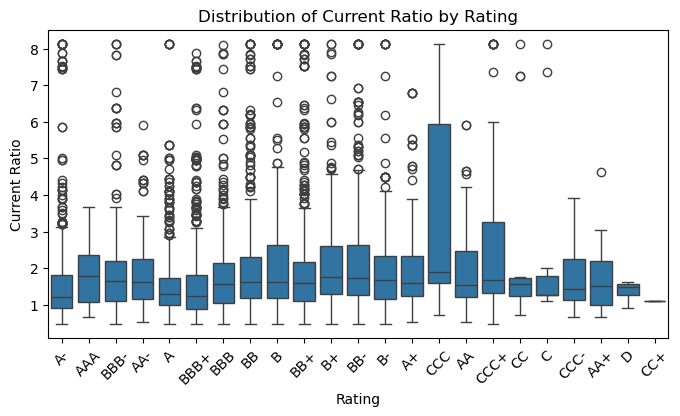

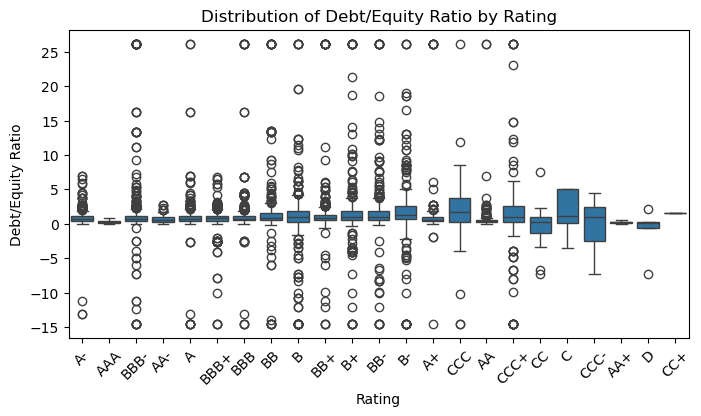

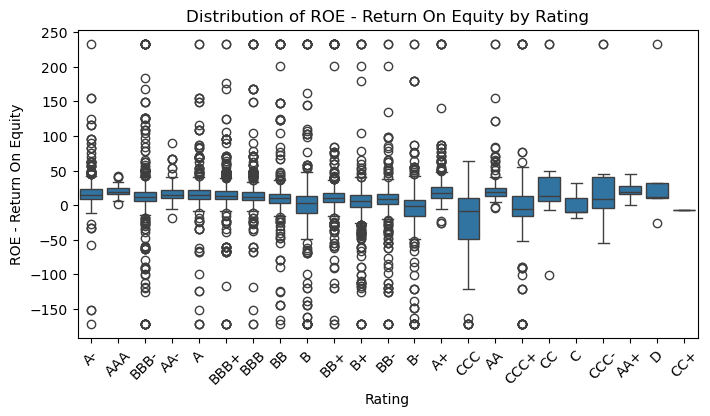

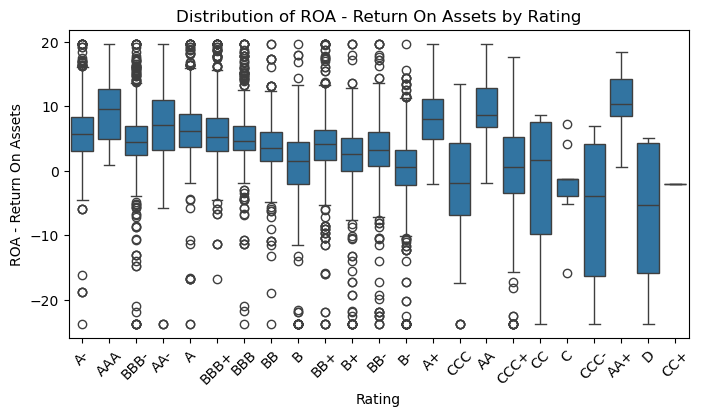

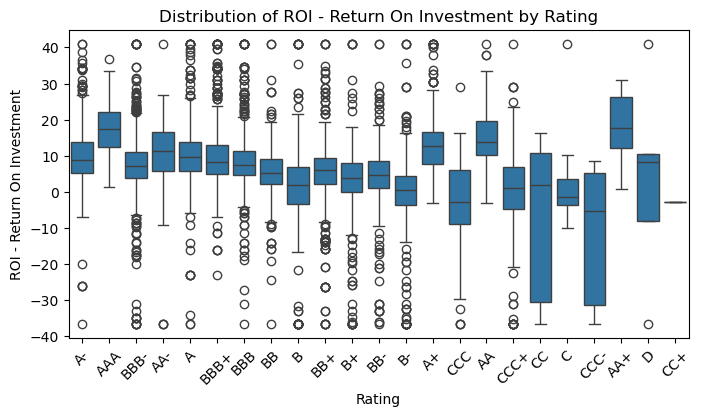

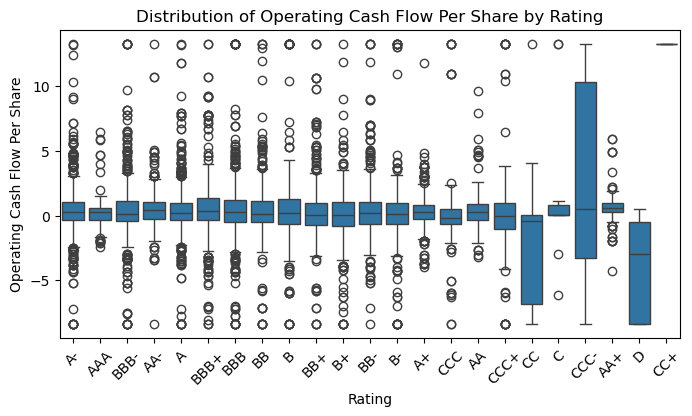

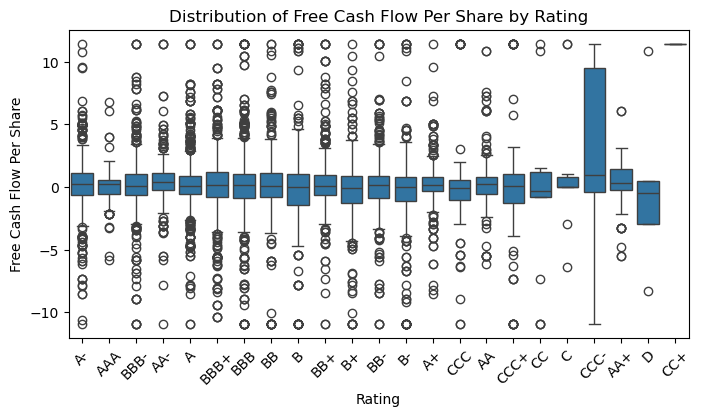

In [9]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="Rating", y=col, data=df)
    plt.title(f"Distribution of {col} by Rating")
    plt.xlabel("Rating")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()

/var/folders/q0/1sz0zzq97f912m2gfyq658bc0000gn/T/ipykernel_79102/858225795.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Rating", y=col, data=df, scale="width", palette="muted")
/var/folders/q0/1sz0zzq97f912m2gfyq658bc0000gn/T/ipykernel_79102/858225795.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="Rating", y=col, data=df, scale="width", palette="muted")


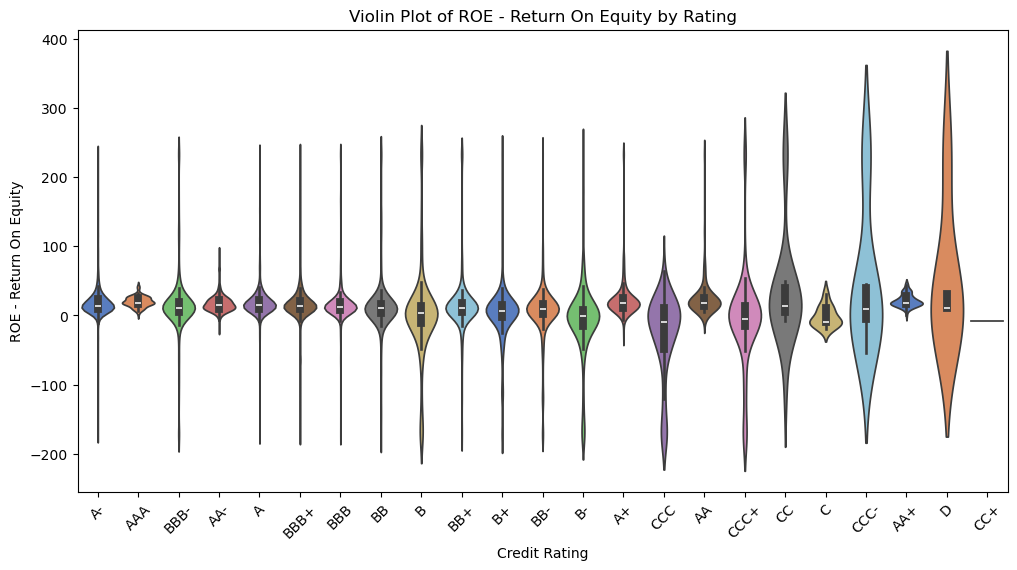

/var/folders/q0/1sz0zzq97f912m2gfyq658bc0000gn/T/ipykernel_79102/858225795.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Rating", y=col, data=df, scale="width", palette="muted")
/var/folders/q0/1sz0zzq97f912m2gfyq658bc0000gn/T/ipykernel_79102/858225795.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="Rating", y=col, data=df, scale="width", palette="muted")


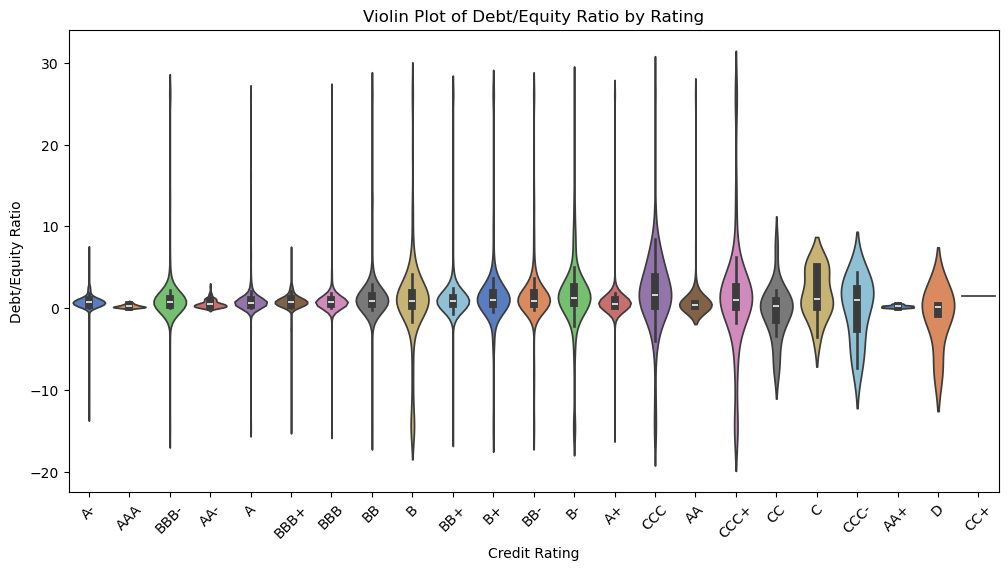

/var/folders/q0/1sz0zzq97f912m2gfyq658bc0000gn/T/ipykernel_79102/858225795.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Rating", y=col, data=df, scale="width", palette="muted")
/var/folders/q0/1sz0zzq97f912m2gfyq658bc0000gn/T/ipykernel_79102/858225795.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="Rating", y=col, data=df, scale="width", palette="muted")


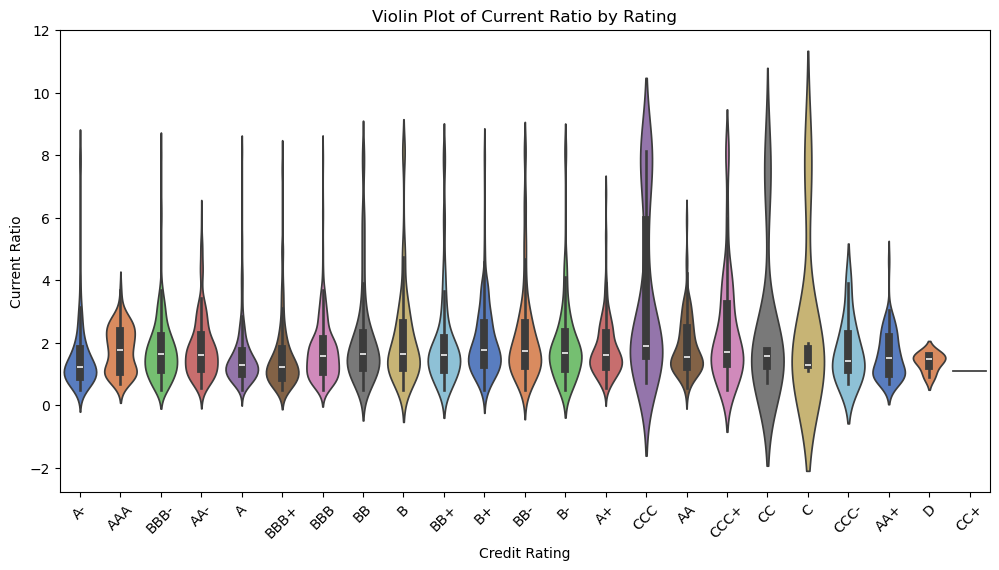

In [10]:
# Cell 1: Violin Plots for Financial Ratios by Rating
# Description: Visualize the distribution of financial ratios grouped by credit ratings.
for col in ["ROE - Return On Equity", "Debt/Equity Ratio", "Current Ratio"]:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Rating", y=col, data=df, scale="width", palette="muted")
    plt.title(f"Violin Plot of {col} by Rating")
    plt.xlabel("Credit Rating")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()

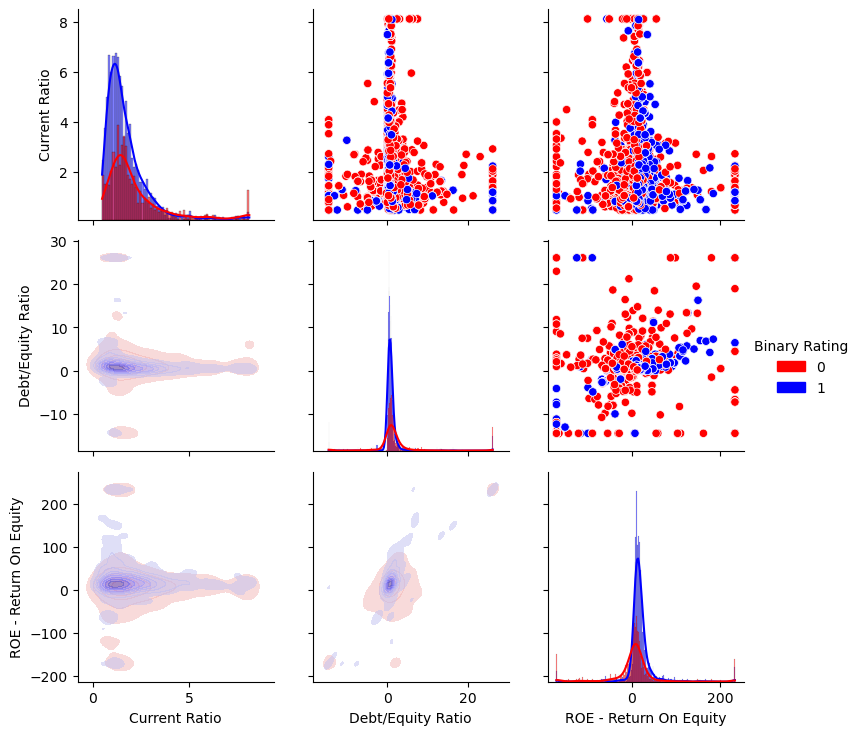

In [11]:
selected_cols = ["Current Ratio", "Debt/Equity Ratio", "ROE - Return On Equity"]
g = sns.PairGrid(df, vars=selected_cols, hue="Binary Rating", palette=["red", "blue"])
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot, fill=True, alpha=0.5)
g = g.map_diag(sns.histplot, kde=True)
g = g.add_legend()
plt.show()


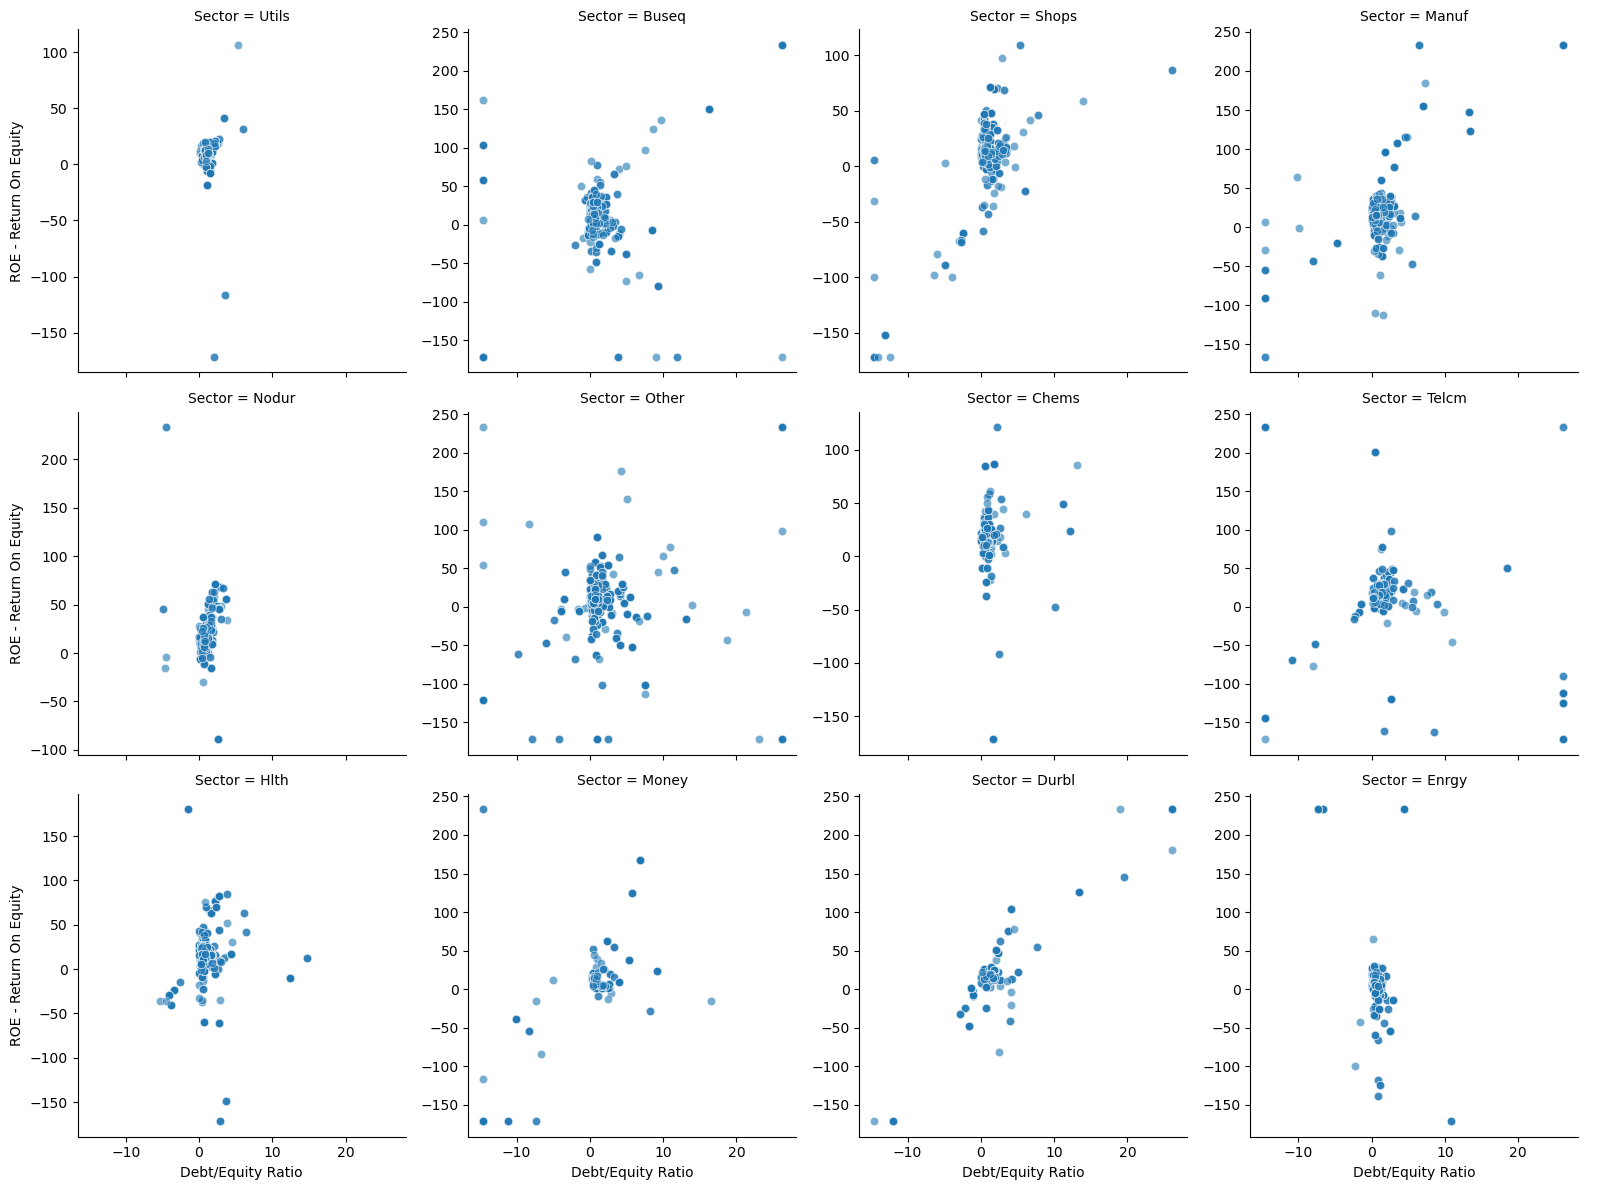

In [12]:
g = sns.FacetGrid(df, col="Sector", col_wrap=4, height=4, sharey=False)
g.map(sns.scatterplot, "Debt/Equity Ratio", "ROE - Return On Equity", alpha=0.6)
g.add_legend()
plt.show()


## Key Findings from PairGrid and ScatterPlots:

Scatter Plots with Binary Ratings:
- The PairGrid reveals clustering of Binary Ratings (0 or 1) with no clear separation across financial ratios.
- This suggests financial ratios alone might not fully explain the distinction between investment-grade and non-investment-grade ratings.

Pairwise Relationships (Debt/Equity vs. ROE):
- Grouped by sector, there’s no uniform trend between Debt/Equity Ratio and ROE, but individual sectors like Energy and Money show some noticeable clustering.

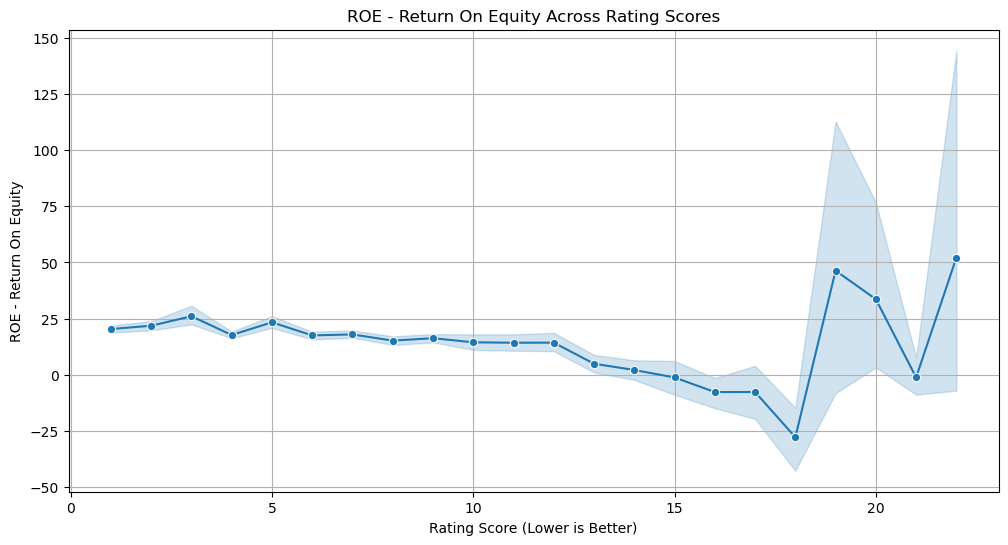

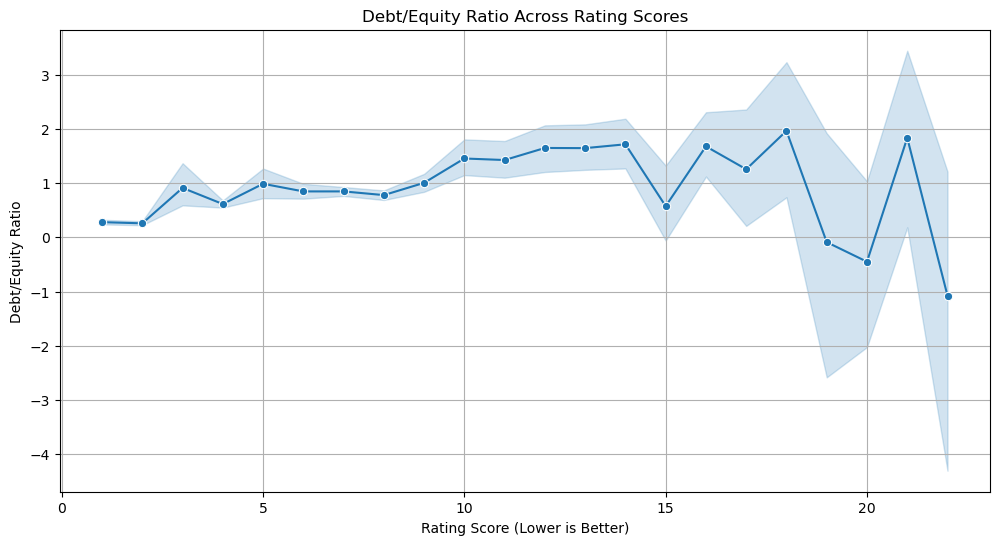

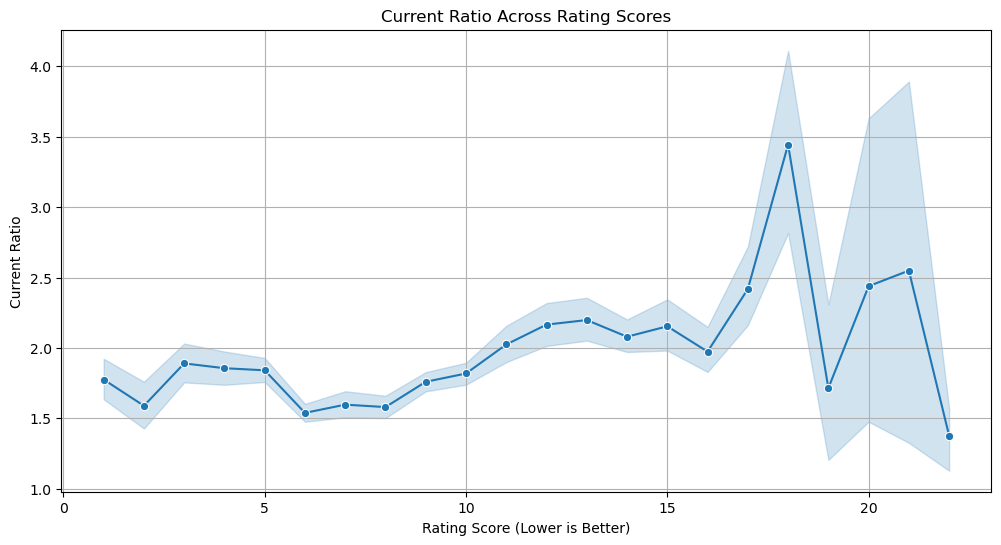

In [13]:
rating_score_map = {
    "AAA": 1, "AA+": 2, "AA": 3, "AA-": 4, "A+": 5, "A": 6, "A-": 7,
    "BBB+": 8, "BBB": 9, "BBB-": 10, "BB+": 11, "BB": 12, "BB-": 13,
    "B+": 14, "B": 15, "B-": 16, "CCC+": 17, "CCC": 18, "CCC-": 19,
    "CC": 20, "C": 21, "D": 22
}
df["Rating Score"] = df["Rating"].map(rating_score_map)

for col in ["ROE - Return On Equity", "Debt/Equity Ratio", "Current Ratio"]:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Rating Score", y=col, data=df, marker="o")
    plt.title(f"{col} Across Rating Scores")
    plt.xlabel("Rating Score (Lower is Better)")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

## Key Findings from Line Plots:
ROE Across Rating Scores:
- ROE remains stable for higher ratings (AAA to BBB-) but declines sharply as scores worsen (e.g., CCC, CC).
- This aligns with the expectation that poorly rated firms struggle with profitability.

Debt/Equity Ratio Across Rating Scores:
- Debt/Equity ratios rise slightly for worsening ratings, peaking for low ratings like CCC and CC.
- Indicates that higher leverage is associated with lower-rated bonds.

Current Ratio Across Rating Scores:
- Current Ratio remains relatively stable but increases slightly for the poorest ratings, reflecting firms holding excess liquidity to mitigate risk.

## General Key Takeaways from the Preliminary EDA:

Stronger Trends in Lower Ratings:
- Financial ratios show clearer trends for lower-rated firms, with increased variability and financial instability.

Sector-Specific Trends:
- Some sectors (e.g., Energy, Money) exhibit clustering patterns, suggesting sectoral differences in how financial ratios affect ratings.

Explaining Ratings with Ratios:
- While trends exist, financial ratios alone may not fully explain ratings. Including sector, rating agency, or nonlinear models might improve insights.

# Combining Financial Ratios with Sector Information 

## Group data by sector and calculate summary statistics
Calculate mean, median, and standard deviation for each ratio by sector

In [14]:
sector_stats = df.groupby("Sector")[ratio_cols].agg(["mean", "median", "std"])
print(sector_stats)

       Current Ratio                   Debt/Equity Ratio                    \
                mean  median       std              mean  median       std   
Sector                                                                       
Buseq       2.376964  1.8571  1.547996          0.881083  0.4773  3.898331   
Chems       2.146700  1.9787  0.813671          1.237032  0.7990  1.886078   
Durbl       1.644546  1.5125  0.458686          3.047461  1.2407  7.432432   
Enrgy       1.389627  1.2965  0.663342          0.587881  0.4773  1.316013   
Hlth        1.961319  1.6312  1.011422          0.958102  0.5581  2.033420   
Manuf       2.158804  2.0184  0.980656          1.279315  0.6651  4.140667   
Money       1.644680  1.1802  1.268268         -0.051383  0.8842  5.549793   
Nodur       1.667059  1.5501  0.760461          0.974623  0.9158  0.882505   
Other       2.366929  1.5486  2.059811          1.263252  0.7241  3.697621   
Shops       1.620108  1.3462  0.859230          0.633587  0.6921

## Normalize financial ratios within sectors
Description: Normalize ratios by subtracting sector mean and dividing by sector std (z-score normalization)

In [15]:
normalized_ratios = df.copy()
for col in ["ROE - Return On Equity", "Debt/Equity Ratio", "Current Ratio"]:
    normalized_ratios[col + " (Z-score)"] = (
        df[col] - df.groupby("Sector")[col].transform("mean")
    ) / df.groupby("Sector")[col].transform("std")

## Visualize sector-adjusted distributions (Violin Plots)
Description: Compare normalized ratios across sectors

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

# Suppress warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

output_folder = "../visualizations/"
os.makedirs(output_folder, exist_ok=True)

shading_palette = sns.light_palette("blue", n_colors=len(normalized_ratios["Sector"].unique()), reverse=True)

sector_shading = dict(zip(normalized_ratios["Sector"].unique(), shading_palette))

for col in ["ROE - Return On Equity (Z-score)", "Debt/Equity Ratio (Z-score)", "Current Ratio (Z-score)"]:
    plt.figure(figsize=(14, 7))

    sns.violinplot(
        x="Sector", y=col, data=normalized_ratios, density_norm="width", inner=None,
        scale="width", palette=sector_shading
    )

    sns.boxplot(
        x="Sector", y=col, data=normalized_ratios, width=0.2, color="black", showcaps=False,
        boxprops={"facecolor": "None"}, whiskerprops={"linewidth": 0.7}
    )

    plt.title(f"Sector-Adjusted {col} Distribution", fontsize=16, weight="bold")
    plt.xlabel("Sector", fontsize=14, weight="bold")
    plt.ylabel(col, fontsize=14, weight="bold")

    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()

    filename = os.path.join(output_folder, f"{col.replace('/', '-').replace(' ', '_')}.png")
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.close()

print("Plots with sector shading saved successfully.")

Plots with sector shading saved successfully.


## Scatter plots by sector to explore relationships
Description: Explore sector-specific trends between financial ratios and Binary Ratings

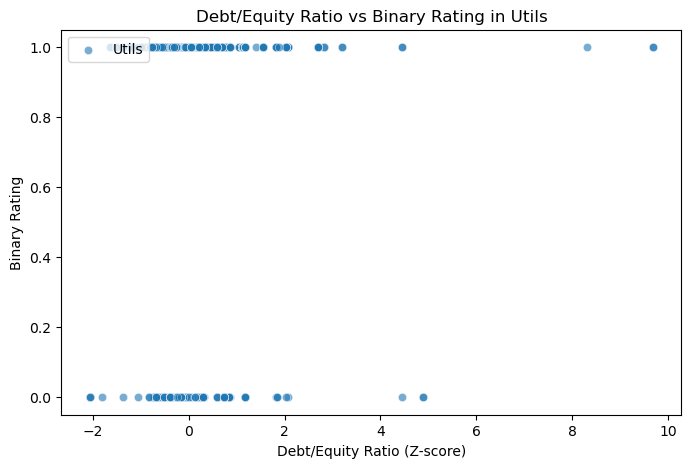

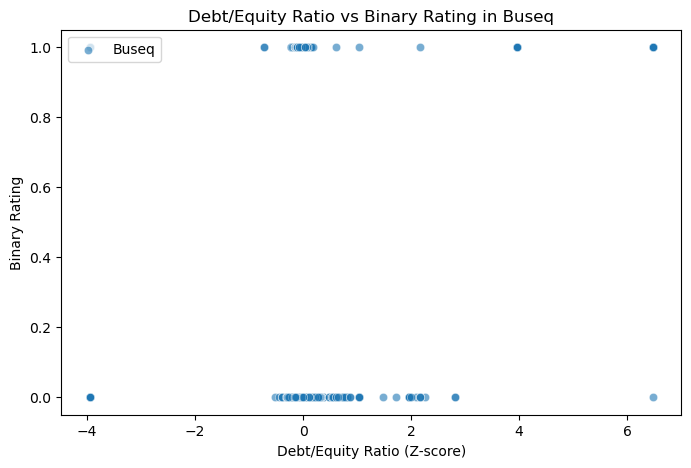

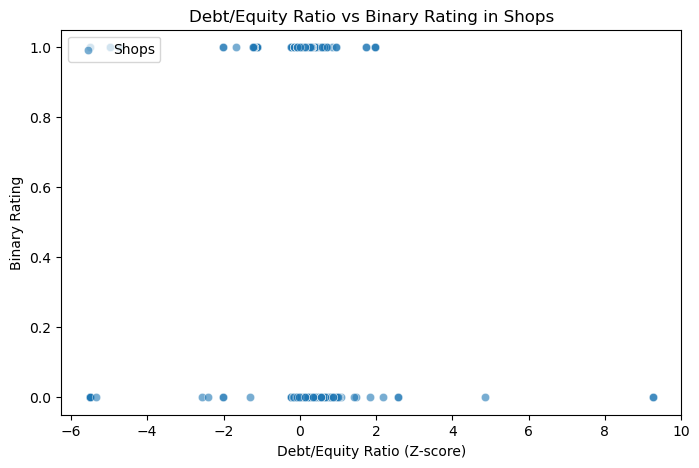

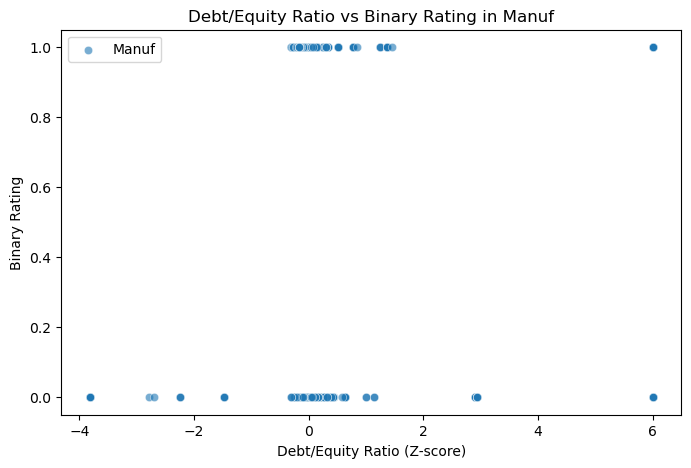

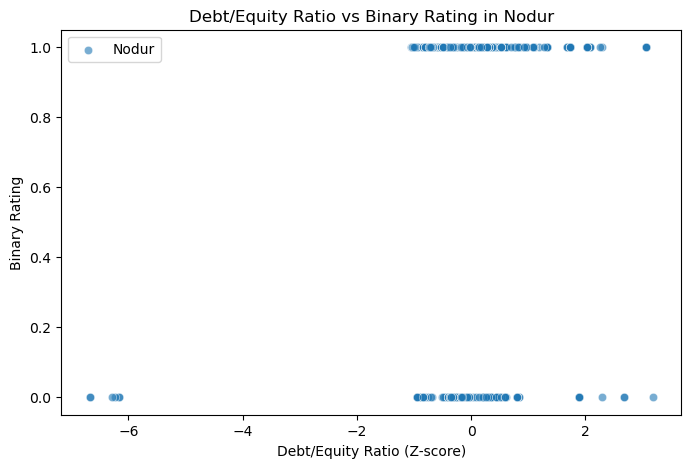

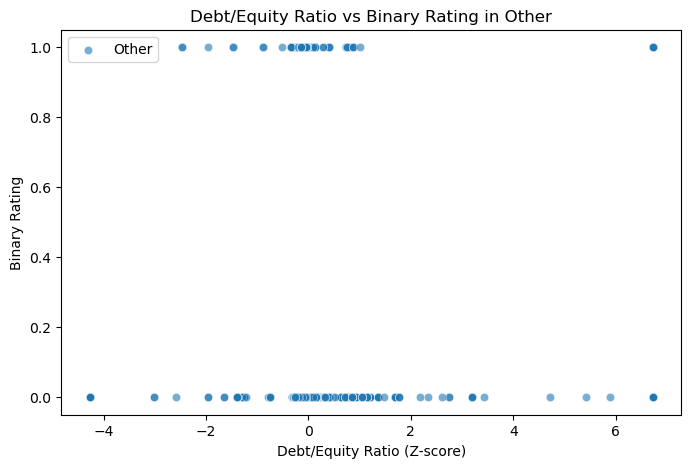

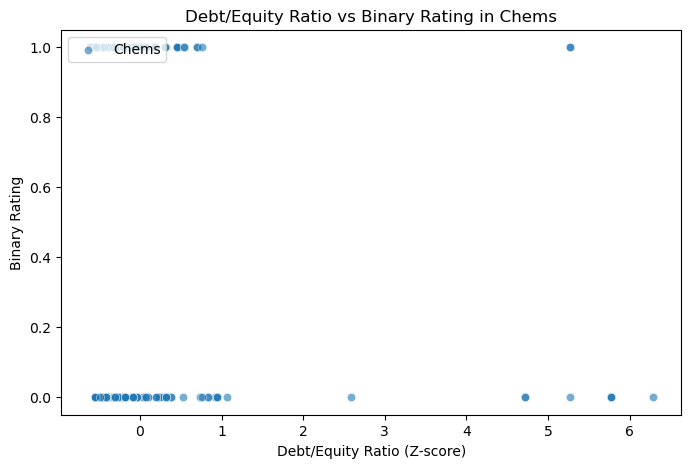

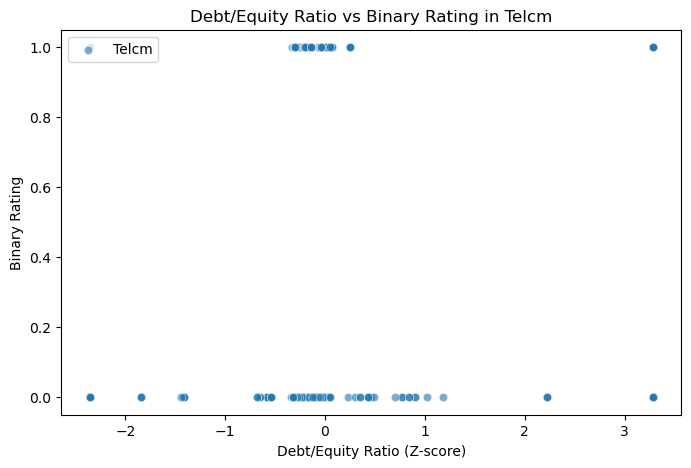

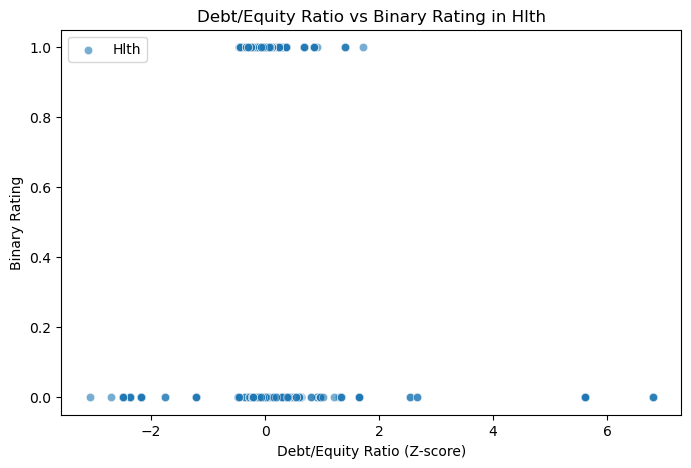

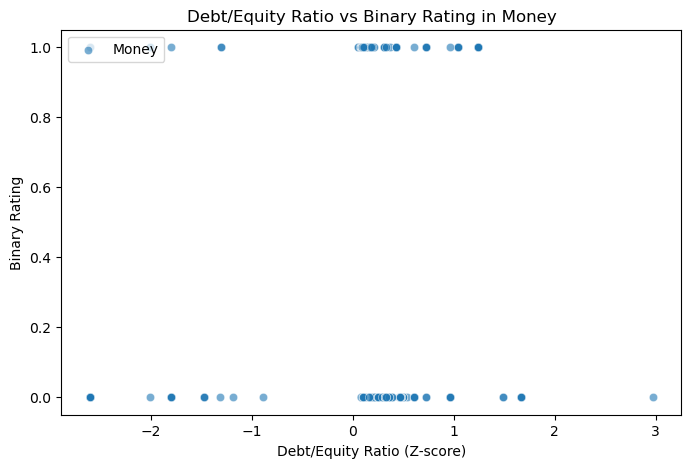

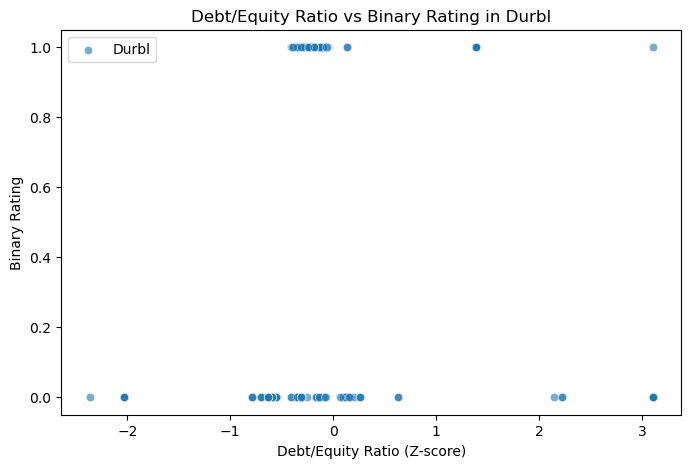

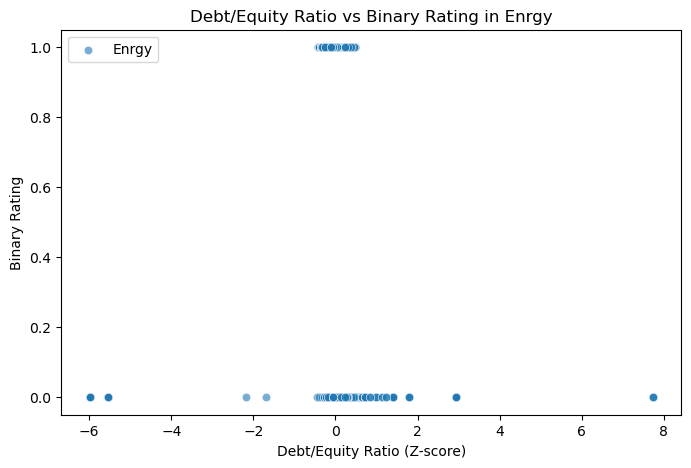

In [17]:
for sector in df["Sector"].unique():
    sector_data = normalized_ratios[normalized_ratios["Sector"] == sector]
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x="Debt/Equity Ratio (Z-score)", y="Binary Rating", data=sector_data, alpha=0.6, label=sector)
    plt.title(f"Debt/Equity Ratio vs Binary Rating in {sector}")
    plt.xlabel("Debt/Equity Ratio (Z-score)")
    plt.ylabel("Binary Rating")
    plt.legend(loc="upper left")
    plt.show()

# Data for D3.js

In [18]:
df['Rating Date'] = pd.to_datetime(df['Rating Date'])

# Extract year from 'Rating Date'
df['Year'] = df['Rating Date'].dt.year

sector_yearly_data = (
    df.groupby(['Sector', 'Year'])['Binary Rating']
      .mean()
      .reset_index()
)

sector_yearly_data.to_json("../data/sector_yearly_data.json", orient="records", date_format="iso")
print("Sector-level aggregated data saved to '../data/sector_yearly_data.json'")

Sector-level aggregated data saved to '../data/sector_yearly_data.json'


# Predictive analysis
Can financial ratios predict credit ratings or binary classifications (investment-grade vs. speculative-grade)?

## Selecting Relevant Features

In [19]:
features = [
    'Current Ratio', 'Debt/Equity Ratio', 'Gross Margin', 'Operating Margin',
    'EBIT Margin', 'EBITDA Margin', 'Net Profit Margin', 'ROE - Return On Equity',
    'ROA - Return On Assets', 'ROI - Return On Investment',
    'Operating Cash Flow Per Share', 'Free Cash Flow Per Share'
]

target = 'Binary Rating'

X = df[features]
y = df[target]

## Standardize the Data

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

## Split Data into Training and Testing Sets

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (6244, 12)
Testing set shape: (1561, 12)


## Train Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, max_iter=1000)

log_reg.fit(X_train, y_train)

coefficients = pd.DataFrame(
    log_reg.coef_[0],
    index=features,
    columns=["Coefficient"]
)
print("Feature Importance:")
print(coefficients)

Feature Importance:
                               Coefficient
Current Ratio                    -0.450148
Debt/Equity Ratio                -0.179023
Gross Margin                      0.442861
Operating Margin                 -1.187214
EBIT Margin                       1.788894
EBITDA Margin                    -0.825296
Net Profit Margin                 0.210912
ROE - Return On Equity            0.152132
ROA - Return On Assets            0.423193
ROI - Return On Investment        0.350618
Operating Cash Flow Per Share    -0.137899
Free Cash Flow Per Share          0.129761


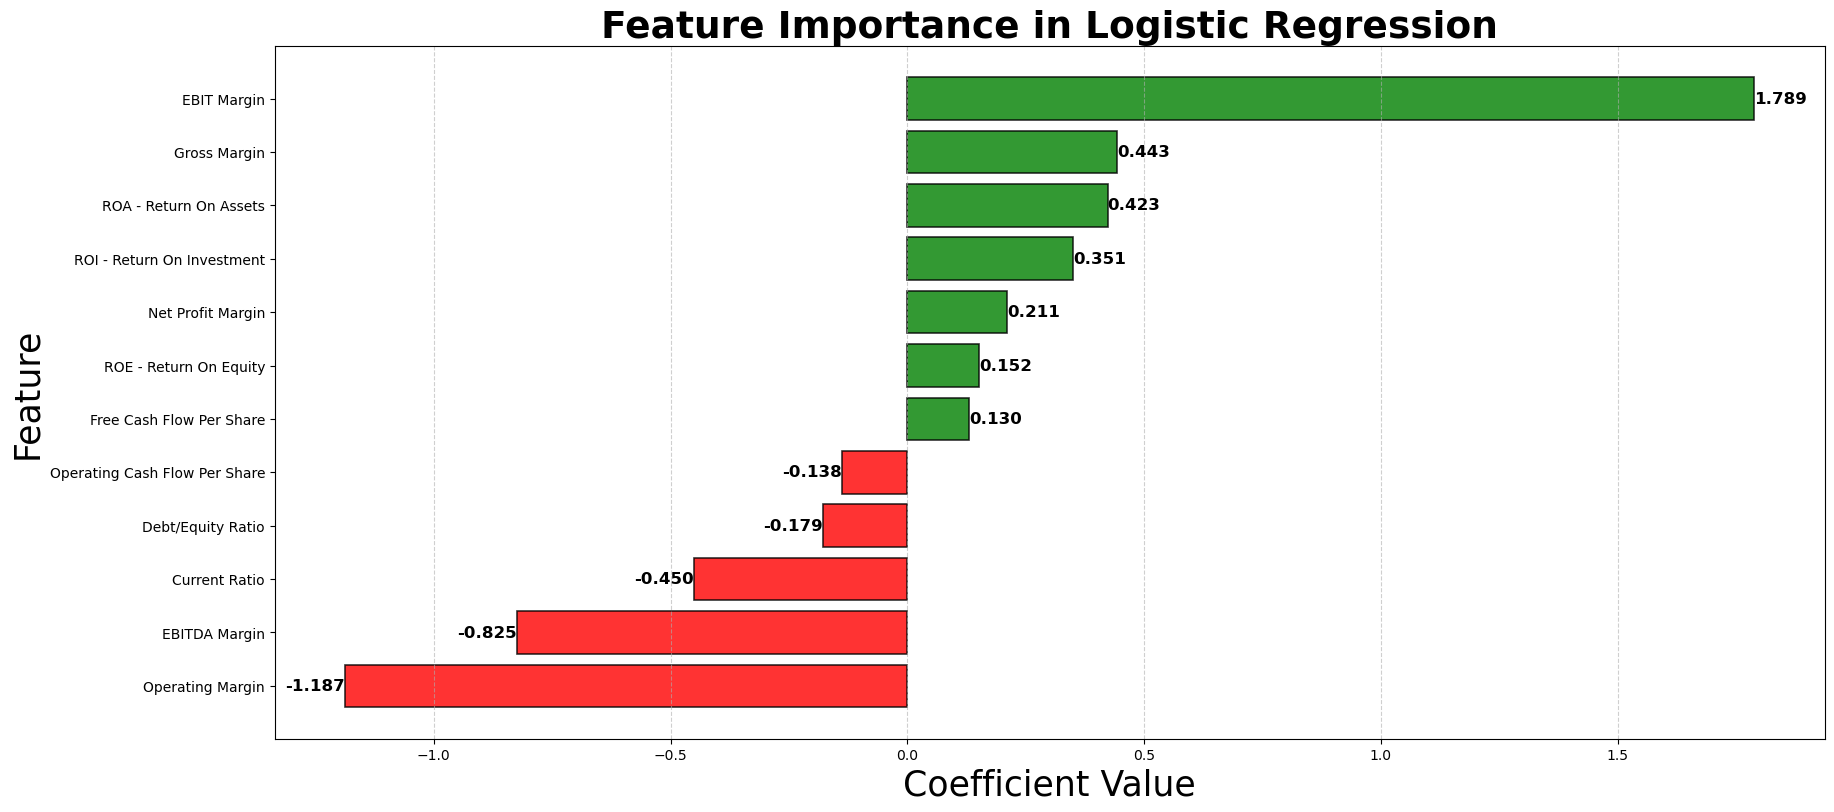

Plot saved at: ../visualizations/feature_importance_plot.png


In [23]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_importance = coefficients.sort_values(by="Coefficient", ascending=True)

# Create color mapping (green for positive, red for negative)
colors = ["red" if coef < 0 else "green" for coef in df_importance["Coefficient"]]

widths = np.abs(df_importance["Coefficient"]) * 2  # Scaling factor for visual effect

plt.figure(figsize=(20, 9))
bars = plt.barh(df_importance.index, df_importance["Coefficient"], 
                color=colors, alpha=0.8, edgecolor="black", linewidth=1.2)

for bar, coef in zip(bars, df_importance["Coefficient"]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{coef:.3f}",
             va="center", ha="left" if coef > 0 else "right", fontsize=12, 
             fontweight="bold", color="black")

plt.title("Feature Importance in Logistic Regression", fontsize=27, fontweight="bold")
plt.xlabel("Coefficient Value", fontsize=25)
plt.ylabel("Feature", fontsize=25)
plt.grid(axis="x", linestyle="--", alpha=0.6)

folder_path = "../visualizations/"
os.makedirs(folder_path, exist_ok=True)
file_path = os.path.join(folder_path, "feature_importance_plot.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

print(f"Plot saved at: {file_path}")

## Model Predictions

In [24]:
y_pred = log_reg.predict(X_test)

## Evaluate the Model

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.75
Precision: 0.75
Recall: 0.92
F1 Score: 0.83


## Confusion Matrix

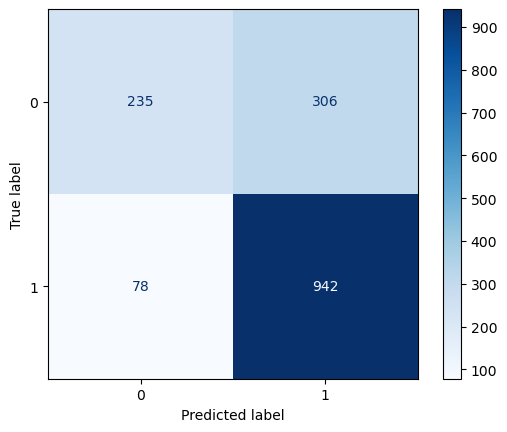

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")

## Fine Tuning the Model

In [27]:
# Get predicted probabilities for the positive class (good rating)
y_probs = log_reg.predict_proba(X_test)[:, 1]

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [i / 100 for i in range(1, 100, 5)]

precision_scores = []
recall_scores = []
f1_scores = []

# Calculate metrics for each threshold
for threshold in thresholds:
    y_pred_thresh = (y_probs >= threshold).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_thresh))
    recall_scores.append(recall_score(y_test, y_pred_thresh))
    f1_scores.append(f1_score(y_test, y_pred_thresh))

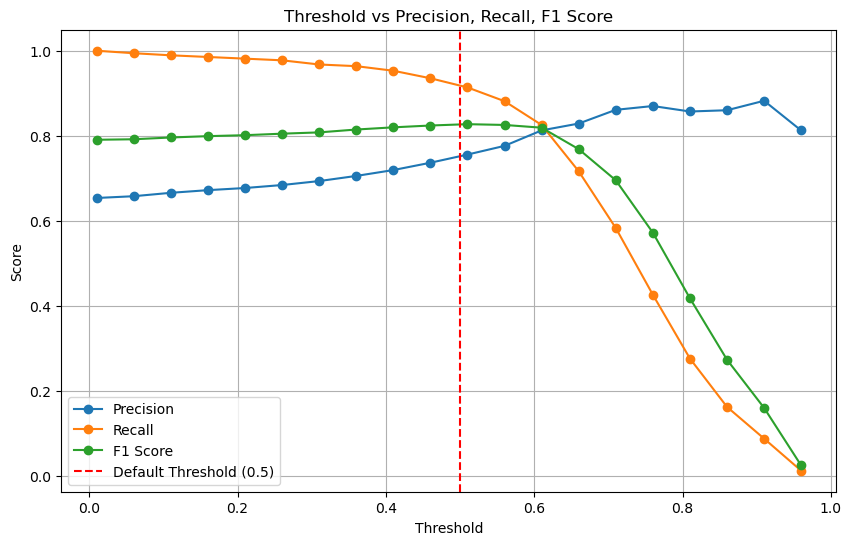

In [29]:
import matplotlib.pyplot as plt

# Plot metrics against thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label="Precision", marker='o')
plt.plot(thresholds, recall_scores, label="Recall", marker='o')
plt.plot(thresholds, f1_scores, label="F1 Score", marker='o')
plt.axvline(0.5, color='red', linestyle='--', label="Default Threshold (0.5)")
plt.title("Threshold vs Precision, Recall, F1 Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

In [30]:
optimal_index = f1_scores.index(max(f1_scores))
optimal_threshold = thresholds[optimal_index]
print(f"Optimal Threshold: {optimal_threshold:.2f}")

Optimal Threshold: 0.51


In [31]:
# Make predictions using the optimal threshold
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

final_precision = precision_score(y_test, y_pred_optimal)
final_recall = recall_score(y_test, y_pred_optimal)
final_f1 = f1_score(y_test, y_pred_optimal)

print(f"Final Precision: {final_precision:.2f}")
print(f"Final Recall: {final_recall:.2f}")
print(f"Final F1 Score: {final_f1:.2f}")

Final Precision: 0.76
Final Recall: 0.91
Final F1 Score: 0.83


# Sector-Specific Analysis

In [32]:
# Split dataset by sector
sector_groups = df.groupby('Sector')

sector_data = {sector: group for sector, group in sector_groups}

for sector, group in sector_data.items():
    print(f"Sector: {sector}, Size: {len(group)}")

Sector: Buseq, Size: 958
Sector: Chems, Size: 315
Sector: Durbl, Size: 221
Sector: Enrgy, Size: 665
Sector: Hlth, Size: 625
Sector: Manuf, Size: 981
Sector: Money, Size: 207
Sector: Nodur, Size: 567
Sector: Other, Size: 1251
Sector: Shops, Size: 786
Sector: Telcm, Size: 386
Sector: Utils, Size: 843


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

sector_performance = {}
sector_feature_importance = {}

for sector, group in sector_data.items():
    X = group[features]  
    y = group['Binary Rating'] 

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    performance = {
        "Sector": sector,  # Add sector name here
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }
    sector_performance[sector] = performance
    
    # Store feature importance
    feature_importance = pd.DataFrame({
        "Feature": features,
        "Coefficient": model.coef_[0]
    }).sort_values(by="Coefficient", ascending=False)
    sector_feature_importance[sector] = feature_importance

sector_performance_df = pd.DataFrame.from_dict(sector_performance, orient="index")

sector_performance_df.reset_index(drop=True, inplace=True)

sector_performance_df.to_csv("../data/sector_performance.csv", index=False)
print("Sector performance metrics saved to '../data/sector_performance.csv'")

Sector performance metrics saved to '../data/sector_performance.csv'


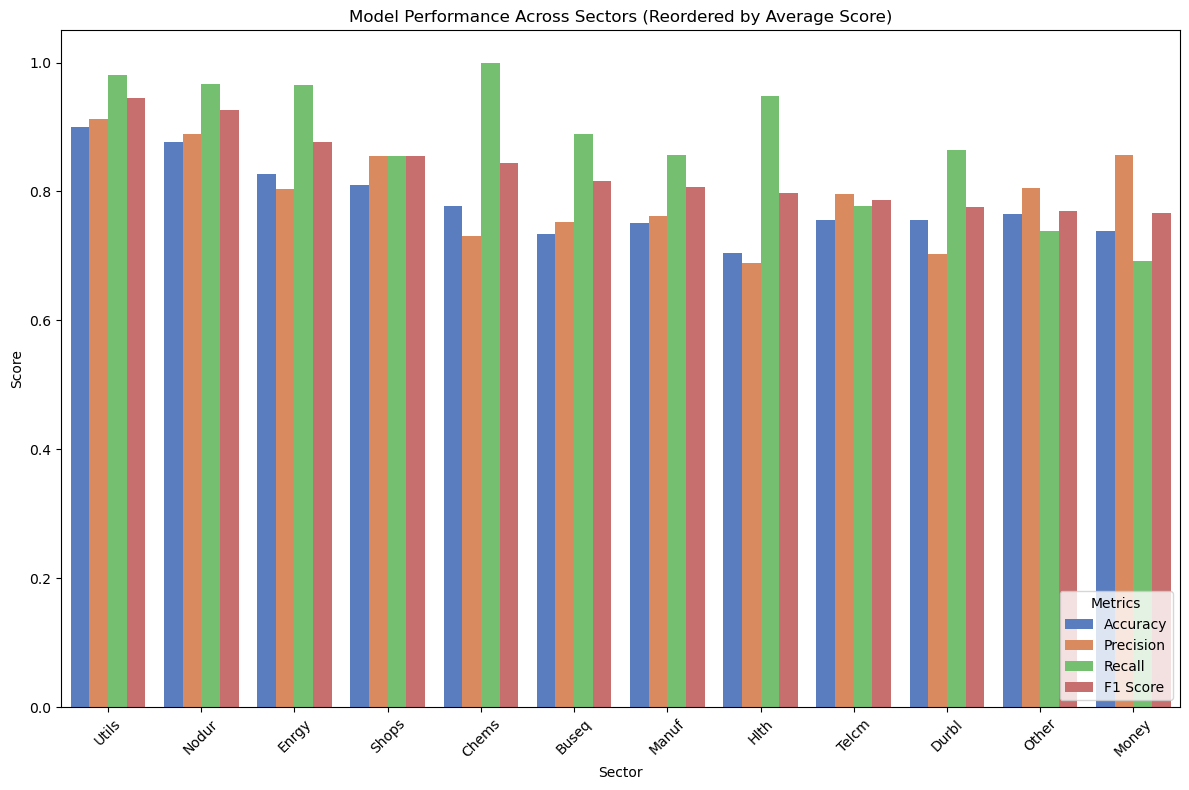

In [34]:
# Calculate the average score for each sector to reorder
sector_performance_df["Average"] = sector_performance_df.drop(columns=["Sector"]).mean(axis=1)
sector_performance_df = sector_performance_df.sort_values(by="Average", ascending=False)

plt.figure(figsize=(12, 8))
sector_data_melted = sector_performance_df.drop(columns="Average").melt(id_vars='Sector', 
                                                                         var_name='Metric', 
                                                                         value_name='Score')
sns.barplot(data=sector_data_melted, x='Sector', y='Score', hue='Metric', palette='muted')
plt.title("Model Performance Across Sectors (Reordered by Average Score)")
plt.xlabel("Sector")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics", loc="lower right")
plt.tight_layout()
plt.show()

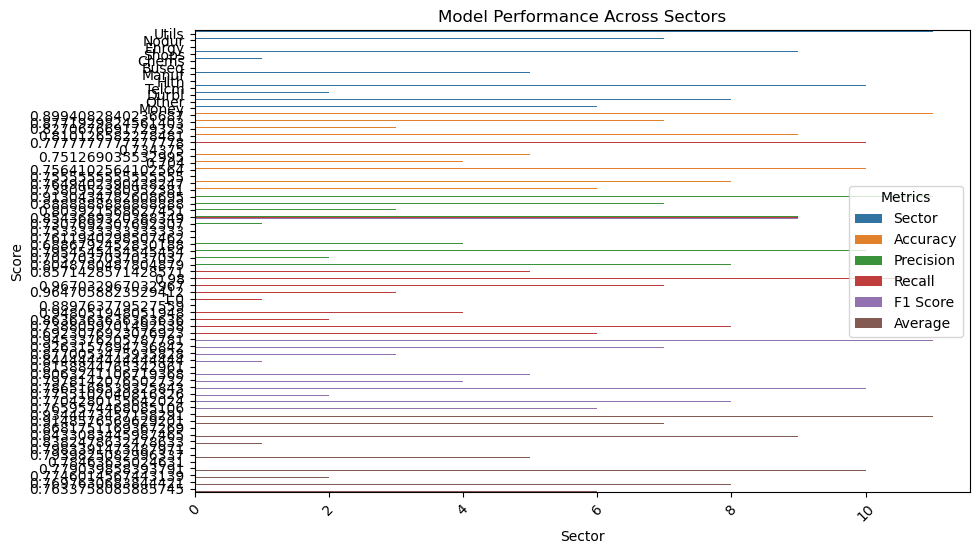

In [35]:
# Visualize performance metrics
plt.figure(figsize=(10, 6))
sns.barplot(data=sector_performance_df.reset_index().melt(id_vars='index', 
            var_name='Metric', value_name='Score'), 
            x='index', y='Score', hue='Metric')
plt.title("Model Performance Across Sectors")
plt.xlabel("Sector")
plt.ylabel("Score")
plt.legend(title="Metrics")
plt.xticks(rotation=45)
plt.show()

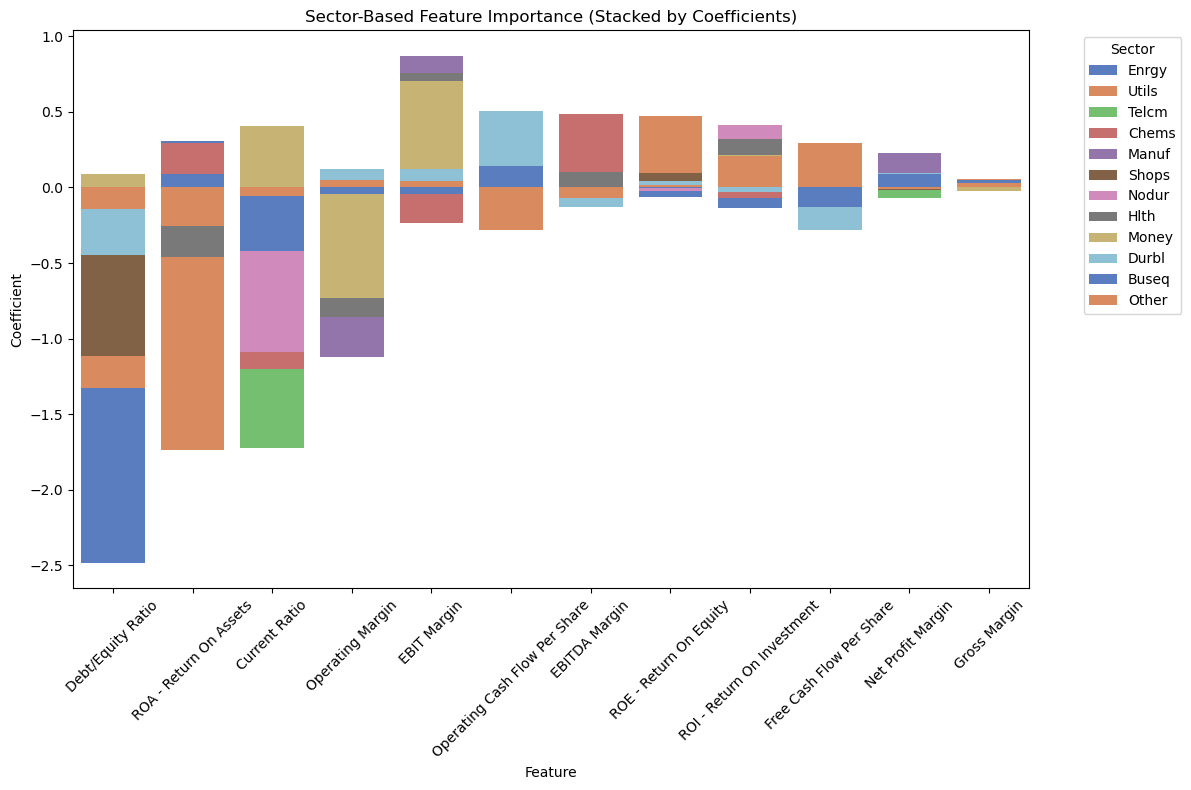

In [36]:
all_feature_importance = pd.concat(
    [df.assign(Sector=sector) for sector, df in sector_feature_importance.items()]
)

all_feature_importance['Absolute Coefficient'] = all_feature_importance['Coefficient'].abs()
all_feature_importance = all_feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=all_feature_importance,
    x='Feature',
    y='Coefficient',
    hue='Sector',
    dodge=False,  # Stacked bar chart effect
    palette="muted"
)
plt.title("Sector-Based Feature Importance (Stacked by Coefficients)")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.xticks(rotation=45)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()
plt.show()

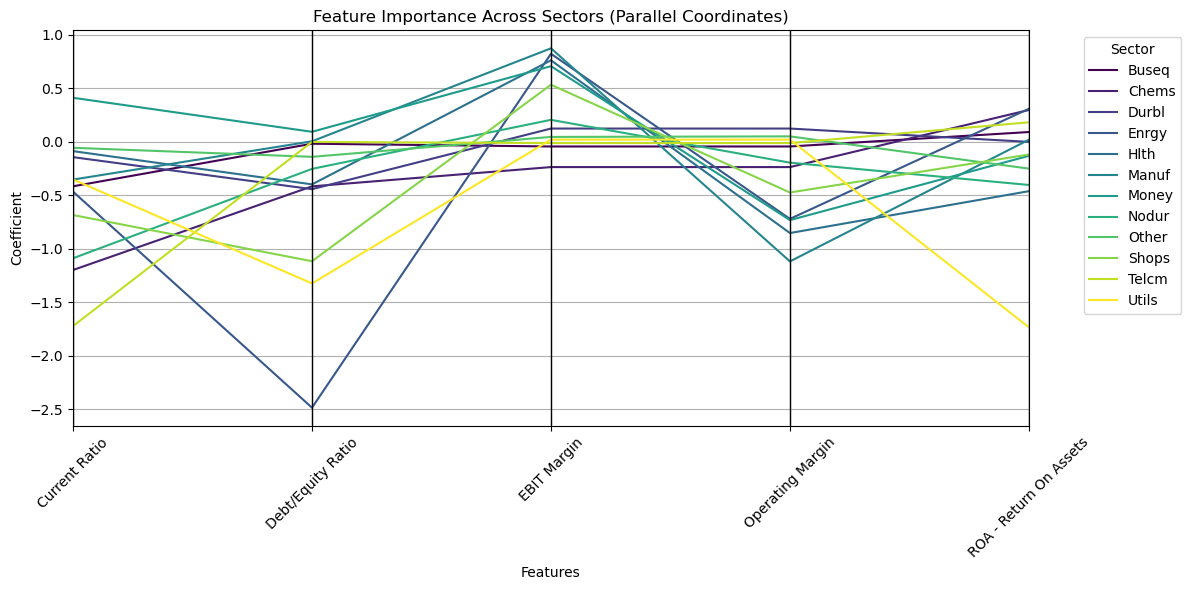

In [37]:
from pandas.plotting import parallel_coordinates

top_features = (
    all_feature_importance.groupby("Feature")["Absolute Coefficient"]
    .mean()
    .nlargest(5)
    .index
)
filtered_data = all_feature_importance[all_feature_importance["Feature"].isin(top_features)]
parallel_data = filtered_data.pivot(index="Sector", columns="Feature", values="Coefficient").reset_index()

plt.figure(figsize=(12, 6))
parallel_coordinates(parallel_data, class_column="Sector", colormap="viridis")
plt.title("Feature Importance Across Sectors (Parallel Coordinates)")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.xticks(rotation=45)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

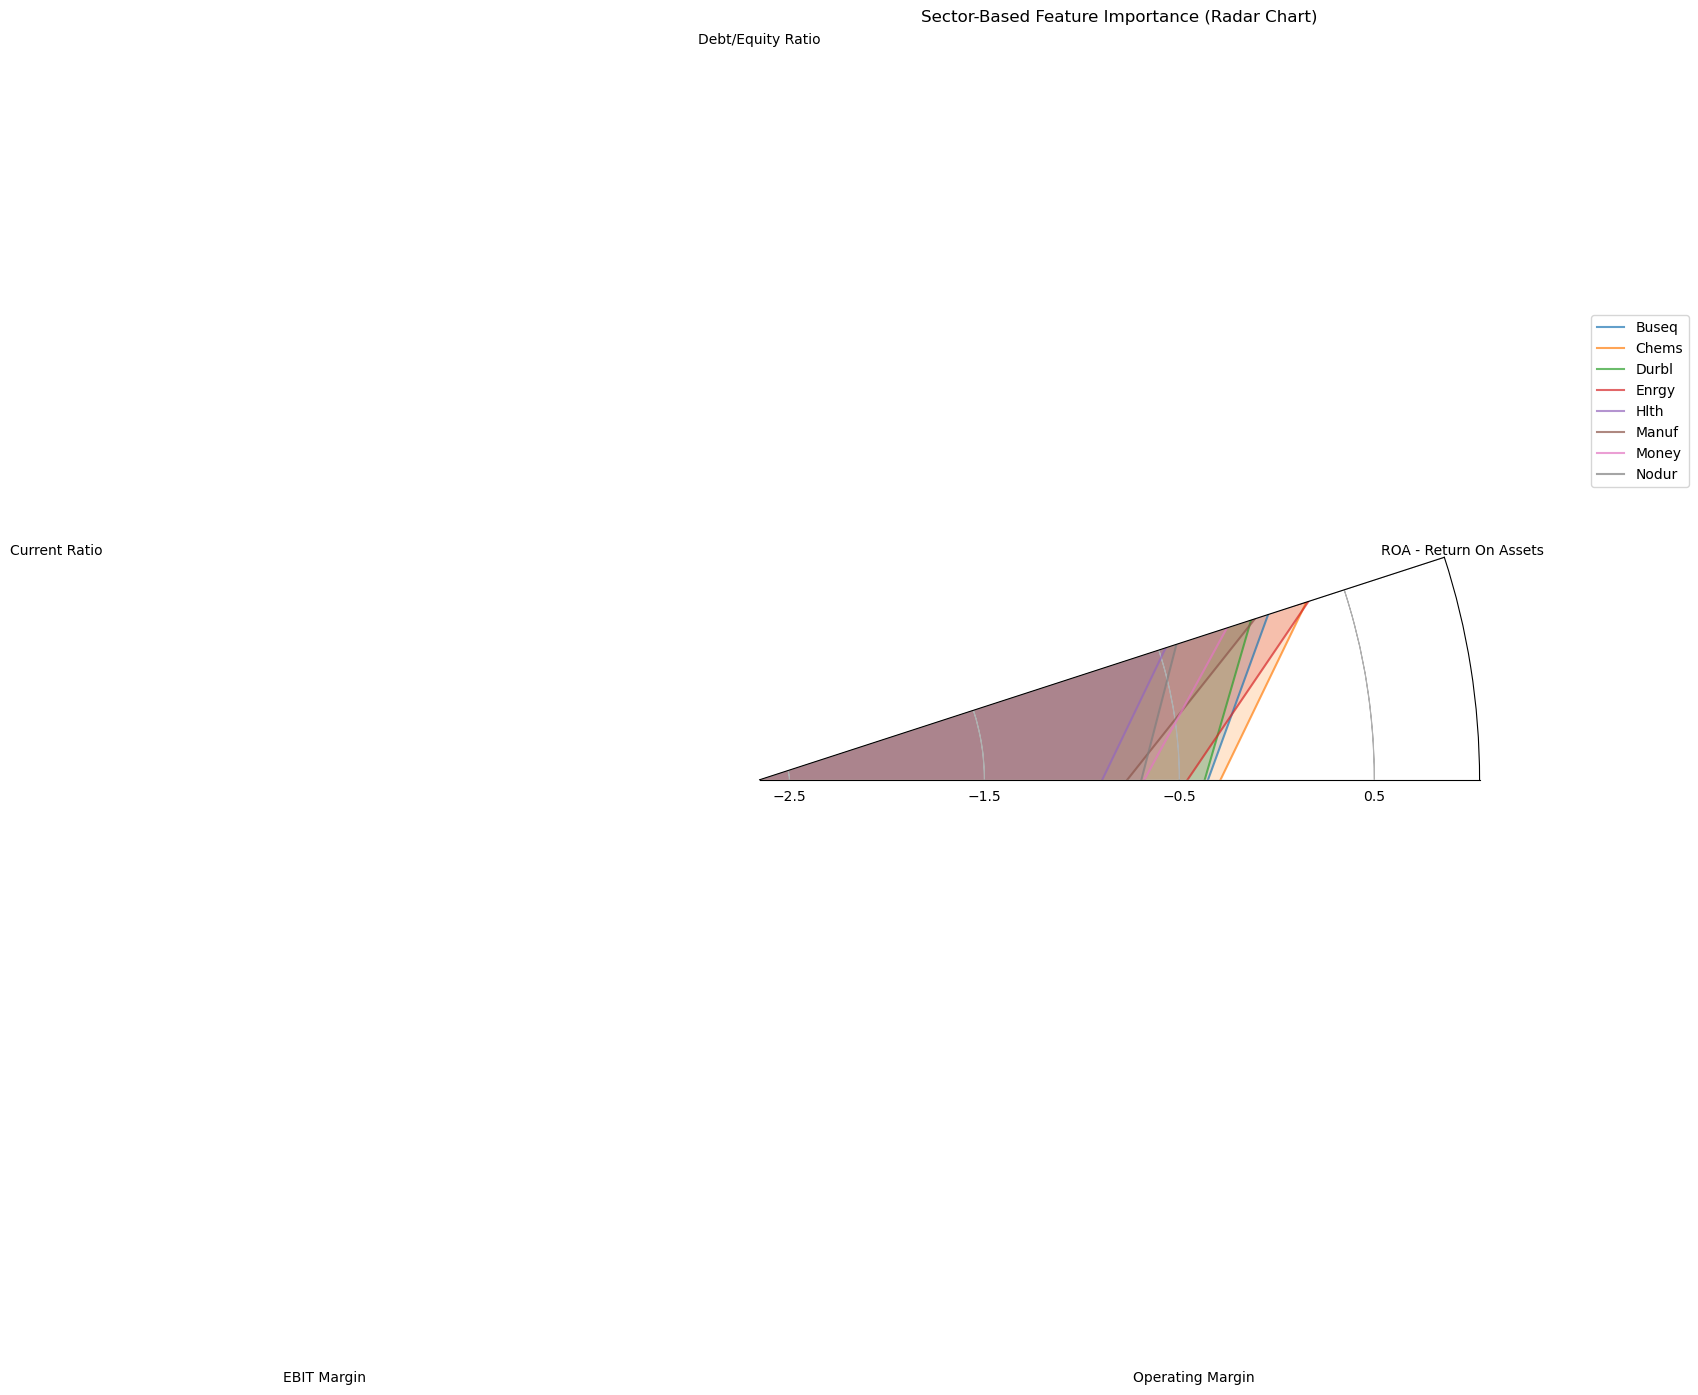

In [38]:
top_features = ["Debt/Equity Ratio", "Current Ratio", "EBIT Margin", "Operating Margin", "ROA - Return On Assets"]
top_sectors = list(sector_feature_importance.keys())[:8]

angles = np.linspace(0, 2 * np.pi, len(top_features), endpoint=False).tolist()
angles += angles[:1] 

start_angle = np.pi / 2  
angles = [angle + start_angle for angle in angles]

fig, ax = plt.subplots(figsize=(20, 18), subplot_kw=dict(polar=True))

for sector in top_sectors:
    sector_data = sector_feature_importance[sector]
    
    sector_values = (
        sector_data.set_index("Feature")
        .reindex(top_features)["Coefficient"]
        .fillna(0)  # Replace NaN with 0
        .values
    )
    sector_values = np.append(sector_values, sector_values[0])  # Close the radar chart

    # Plot the data
    ax.plot(angles, sector_values, label=sector, alpha=0.7)
    ax.fill(angles, sector_values, alpha=0.2)

ax.set_yticks(np.arange(-2.5, 1.5, 1))
ax.set_xticks(angles[:-1])
ax.set_xticklabels(top_features, rotation=0, ha="center")  # Rotate labels upright
ax.set_title("Sector-Based Feature Importance (Radar Chart)", va='bottom')

ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1))

plt.subplots_adjust(left=0.1, right=0.5, top=0.5, bottom=0.1)
plt.show()

In [39]:
import json

# Extract top 5 features across sectors
top_features = (
    all_feature_importance.groupby("Feature")["Absolute Coefficient"]
    .mean()
    .nlargest(5)
    .index.tolist()
)

# Prepare data for JSON
export_data = {}

for sector, feature_importance_df in sector_feature_importance.items():
    # Filter only the top features for each sector
    filtered_df = feature_importance_df[feature_importance_df["Feature"].isin(top_features)]

    export_data[sector] = filtered_df[["Feature", "Coefficient"]].to_dict(orient="records")

output_path = "../data/feature_importance_data.json"
with open(output_path, "w") as json_file:
    json.dump(export_data, json_file, indent=4)

print(f"Feature importance data saved to {output_path}")

Feature importance data saved to ../data/feature_importance_data.json
